In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import gzip
import io
#import sparseconvnet as scn
# from sklearn.metrics import classification_report
# from torch.utils.data import random_split
# from torch.utils.data import DataLoader
# from torchvision.transforms import ToTensor
# from torchvision.datasets import KMNIST
# from torch.optim import Adam
# from torch import nn


import argparse

import time

In [17]:
import numpy as np

array = np.array([[[200,0,0]],[[2,0,0]]])
reshaped_array = array.reshape(-1, 2)
print(array)
print(reshaped_array)


[[[200   0   0]]

 [[  2   0   0]]]
[[200   0]
 [  0   2]
 [  0   0]]


In [18]:
x=np.array([[1,3],[3,4],[5,6]])
length=x.shape[0]
numb=1000000-length
print(length)
x=np.pad(x,((0,numb),(0,0)),'constant')
print(x)

3
[[1 3]
 [3 4]
 [5 6]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [19]:



f = '/home/sam/sra_files/control_SRR17006224.bed.gz'
with gzip.open(f, 'rb') as file:
        file_content = file.read().decode('utf-8')  # Decode the bytes to string
    
        # Process the file content and convert it into a DataFrame
        # Assuming the file content is in a specific format, modify the code accordingly
        # For example, if the content is a CSV file, you can use pd.read_csv()
        # If it's in JSON format, you can use pd.read_json(), etc.
df = pd.read_csv(io.BytesIO(file_content.encode()), delimiter='\t')  # Use BytesIO to read from bytes
header = ['chrom', 'read_start', 'read_end', 'name', 'score', 'strand']
df.columns = header[:len(df.columns)]
df=df.sort_values('name')
print(df.head())


         chrom  read_start   read_end                   name  score strand
1358804   chr3   185428542  185428641  SRR17006224.2970002/1     42      +
1358807   chr3   185428676  185428777  SRR17006224.2970002/2     42      -
467561   chr13    26964842   26964943  SRR17006224.2970003/1     42      -
467559   chr13    26964743   26964844  SRR17006224.2970003/2     42      +
1498113   chr5   132446840  132446940  SRR17006224.2970004/1     42      -


In [20]:
df['name'] = df['name'].str.rstrip('12') + '1'
print(df.head())


         chrom  read_start   read_end                   name  score strand
1358804   chr3   185428542  185428641  SRR17006224.2970002/1     42      +
1358807   chr3   185428676  185428777  SRR17006224.2970002/1     42      -
467561   chr13    26964842   26964943  SRR17006224.2970003/1     42      -
467559   chr13    26964743   26964844  SRR17006224.2970003/1     42      +
1498113   chr5   132446840  132446940  SRR17006224.2970004/1     42      -


In [21]:
df['frag_length']=df.groupby('name')['read_end'].transform('max') - df.groupby('name')['read_start'].transform('min')
print(df.head())


         chrom  read_start   read_end                   name  score strand  \
1358804   chr3   185428542  185428641  SRR17006224.2970002/1     42      +   
1358807   chr3   185428676  185428777  SRR17006224.2970002/1     42      -   
467561   chr13    26964842   26964943  SRR17006224.2970003/1     42      -   
467559   chr13    26964743   26964844  SRR17006224.2970003/1     42      +   
1498113   chr5   132446840  132446940  SRR17006224.2970004/1     42      -   

         frag_length  
1358804          235  
1358807          235  
467561           200  
467559           200  
1498113          156  


In [22]:
df_unique = df.groupby('name',as_index=False).agg({
    'chrom': 'first',
    'read_start': 'min',
    'read_end': 'max',
    'name':'first',
    'score': 'first',
    'strand': 'first',
    'frag_length':'first'
})

#df_unique = df.drop_duplicates(subset='Nname', keep='first')
df_unique=df_unique.sort_values('read_start')
df_unique["chrom"] = df_unique["chrom"].str.split("_").str.get(0)
mask = df_unique["chrom"].str.startswith("chrUn")

# Filter the DataFrame to exclude rows with "chrUn" chromosomes
df_unique= df_unique[~mask]

print(df_unique.head())

        chrom  read_start  read_end                   name  score strand  \
39145   chr16          17       148  SRR17006224.3009253/1      1      -   
290237  chr16          21       178  SRR17006224.3261081/1      1      +   
642954  chr11          31       208  SRR17006224.3614945/1      1      +   
975280  chr17          33       194  SRR17006224.3948315/1      0      -   
45507    chr2          34       183  SRR17006224.3015624/1      1      -   

        frag_length  
39145           131  
290237          157  
642954          177  
975280          161  
45507           149  


In [23]:
df_unique = df_unique[df_unique.frag_length <= 1000]
df_unique['frag_length'].max()
df_unique=df_unique.sort_values('chrom')
print(df_unique.head())

       chrom  read_start   read_end                   name  score strand  \
435782  chr1   248945345  248945482  SRR17006224.3407085/1      1      -   
645744  chr1    52367282   52367465  SRR17006224.3617740/1     42      +   
647696  chr1    52367282   52367465  SRR17006224.3619698/1     42      +   
320514  chr1    25860111   25860595  SRR17006224.3291447/1     42      +   
717042  chr1    52367297   52367459  SRR17006224.3689239/1     40      +   

        frag_length  
435782          137  
645744          183  
647696          183  
320514          484  
717042          162  


In [24]:
#create a list or dictionary with the values of the positions
chrom_pos={'chr1': 0,
'chr2': 248956422,
'chr3': 491149951,
'chr4': 689445510,
'chr5': 879660065,
'chr6': 1061198324,
'chr7': 1232004303,
'chr8': 1391350276,
'chr9': 1536488912,
'chr10': 1674883629,
'chr11': 1808681051,
'chr12': 1943767673,
'chr13': 2077042982,
'chr14': 2191407310,
'chr15': 2298451028,
'chr16': 2400442217,
'chr17': 2490780562,
'chr18': 2574038003,
'chr19': 2654411288,
'chr20': 2713028904,
'chr21': 2777473071,
'chr22': 2824183054,
'chrX': 2875001522,
'chrY': 3031042417}
print(chrom_pos)

for key, value in chrom_pos.items():

    mask = df_unique['chrom'] == key
    
    df_unique.loc[mask, 'read_start'] += value
    df_unique.loc[mask,'read_end']+=value
print(df_unique.head())

{'chr1': 0, 'chr2': 248956422, 'chr3': 491149951, 'chr4': 689445510, 'chr5': 879660065, 'chr6': 1061198324, 'chr7': 1232004303, 'chr8': 1391350276, 'chr9': 1536488912, 'chr10': 1674883629, 'chr11': 1808681051, 'chr12': 1943767673, 'chr13': 2077042982, 'chr14': 2191407310, 'chr15': 2298451028, 'chr16': 2400442217, 'chr17': 2490780562, 'chr18': 2574038003, 'chr19': 2654411288, 'chr20': 2713028904, 'chr21': 2777473071, 'chr22': 2824183054, 'chrX': 2875001522, 'chrY': 3031042417}
       chrom  read_start   read_end                   name  score strand  \
435782  chr1   248945345  248945482  SRR17006224.3407085/1      1      -   
645744  chr1    52367282   52367465  SRR17006224.3617740/1     42      +   
647696  chr1    52367282   52367465  SRR17006224.3619698/1     42      +   
320514  chr1    25860111   25860595  SRR17006224.3291447/1     42      +   
717042  chr1    52367297   52367459  SRR17006224.3689239/1     40      +   

        frag_length  
435782          137  
645744          18

       chrom  read_start   read_end                   name  score strand  \
8550    chr3   623427175  623427619  SRR17006224.2978576/1     23      -   
496431  chr3   607187011  607187180  SRR17006224.3467947/1     42      -   
655054  chr3   607186177  607186361  SRR17006224.3627083/1     42      +   
316043  chr3   504175124  504175294  SRR17006224.3286967/1     42      +   
366291  chr3   604694653  604695123  SRR17006224.3337358/1     42      -   
...      ...         ...        ...                    ...    ...    ...   
841197  chr3   531364212  531364385  SRR17006224.3813798/1     42      +   
522048  chr3   689247064  689247202  SRR17006224.3493657/1      1      +   
691729  chr3   548895205  548895374  SRR17006224.3663855/1     42      -   
645150  chr3   525255682  525256013  SRR17006224.3617144/1     42      -   
953289  chr3   512345748  512345954  SRR17006224.3926259/1     42      -   

        frag_length  
8550            444  
496431          169  
655054          184  

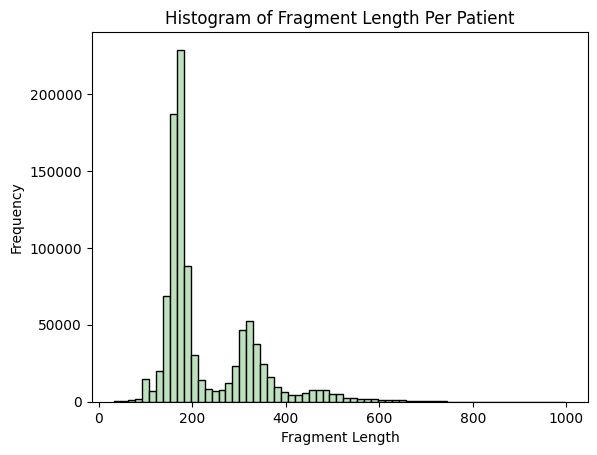

In [25]:
print(df_unique[df_unique['chrom']=='chr3'])
df_unique['frag_length'].hist(bins=65,color='#BDE0BD', edgecolor='black', grid=False)

# Set labels and title
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.title('Histogram of Fragment Length Per Patient')

# Show the plot
plt.show()








In [26]:
chromed=df_unique['chrom'].unique()
max_index=3088269832
max_index_adj=3088358329
zero_reads = np.zeros( max_index_adj,dtype='uint8')
read_tonump1 = df_unique['read_start'].tolist()
read_tonump2=df_unique['read_end'].tolist()
zero_reads[read_tonump1]=1
zero_reads[read_tonump2]=1
df=df_unique
df=df.sort_values('read_start')
print(df.head())


       chrom  read_start  read_end                   name  score strand  \
967764  chr1          35       196  SRR17006224.3940770/1      1      -   
610272  chr1         878      1181  SRR17006224.3582158/1      1      -   
228858  chr1        1028      1243  SRR17006224.3199512/1      1      +   
501838  chr1        1100      1371  SRR17006224.3473375/1      1      +   
68137   chr1        1780      1929  SRR17006224.3038334/1      1      +   

        frag_length  
967764          161  
610272          303  
228858          215  
501838          271  
68137           149  


In [27]:
import pandas as pd
import numpy as np

# Instead of assigning to a new variable, modify the original dataframe
df = df_unique

# Specify the number of bins
num_bins = 20000

# Calculate the bin edges
bin_edges = np.linspace(0, 3088269832, num_bins + 1)

# Calculate the histogram
hist, bins = np.histogram(
    np.concatenate([df['read_start'].values, df['read_end'].values]),
    bins=bin_edges
)

# Calculate the bin indices for the 'read_start' column
bin_indices = np.searchsorted(bin_edges, df['read_start'], side='right') - 1

# Calculate the counts of fragment lengths above and below 160 for each bin

condition1 = (df['frag_length'] <= 220) & (df['frag_length'] >= 100)
condition2 = (df['frag_length'] <= 400) & (df['frag_length'] >= 300)
condition3 = (df['frag_length'] <= 590) & (df['frag_length'] >= 470)

# Combine the conditions using logical OR (|)
combined_condition = condition1 | condition2 | condition3

# Calculate small_counts using the combined condition
small_counts = np.bincount(bin_indices, weights=combined_condition, minlength=num_bins)
medium_counts=np.bincount(bin_indices, weights=(df['frag_length'] <= 160), minlength=num_bins)
# Calculate large_counts using the condition for large fragments
large_counts = np.bincount(bin_indices, weights=(df['frag_length'] > 160), minlength=num_bins)

result_array = np.column_stack((hist, small_counts))
print(result_array)
# Calculate the ratio for each bin
ratio = np.where(small_counts == 0, 0, np.where(large_counts == 0, 1, small_counts / large_counts))
print(max(ratio))
new_counts=np.log(hist)
new_counts[new_counts==-np.inf]=0
# Create a DataFrame with bin indices, counts, and ratio
df_result = pd.DataFrame({
    'Bin Indices': np.arange(num_bins),
    'new_counts':new_counts,
    'Counts': hist,
    'true_counts': small_counts,
    'Small counts':medium_counts,
    'Large Counts': large_counts,
    'Ratio': np.round(ratio*10)
})

# Calculate the sum of small and large counts
total_counts = small_counts + large_counts

# Update the 'Counts' column in the DataFrame

arr=np.expand_dims(new_counts,axis=1)
arr=np.expand_dims(arr,axis=0)
print(arr)
print(arr.shape)

# Print the resulting DataFrame
print(df_result)

[[1252.  553.]
 [ 492.  222.]
 [ 216.   94.]
 ...
 [  36.   15.]
 [  14.    6.]
 [  68.   27.]]
10.0
[[[7.13249755]
  [6.19847872]
  [5.37527841]
  ...
  [3.58351894]
  [2.63905733]
  [4.21950771]]]
(1, 20000, 1)
       Bin Indices  new_counts  Counts  true_counts  Small counts  \
0                0    7.132498    1252        553.0         116.0   
1                1    6.198479     492        222.0          52.0   
2                2    5.375278     216         94.0          22.0   
3                3    4.927254     138         64.0          18.0   
4                4    4.406719      82         39.0           4.0   
...            ...         ...     ...          ...           ...   
19995        19995    0.000000       0          0.0           0.0   
19996        19996    0.000000       0          0.0           0.0   
19997        19997    3.583519      36         15.0           4.0   
19998        19998    2.639057      14          6.0           0.0   
19999        19999    4.2195

/tmp/ipykernel_1009/1796732626.py:40: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(small_counts == 0, 0, np.where(large_counts == 0, 1, small_counts / large_counts))
/tmp/ipykernel_1009/1796732626.py:40: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(small_counts == 0, 0, np.where(large_counts == 0, 1, small_counts / large_counts))
/tmp/ipykernel_1009/1796732626.py:42: RuntimeWarning: divide by zero encountered in log
  new_counts=np.log(hist)


(100000000,)


/tmp/ipykernel_1009/4150930369.py:4: RuntimeWarning: divide by zero encountered in log
  hist=np.log(hist)


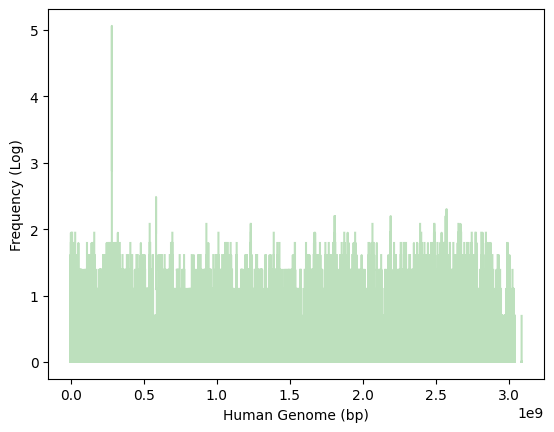

In [28]:


# Create a 1D histogram with 55,000 bins using the values from both columns
hist, bins = np.histogram(np.concatenate([df_unique['read_start'].values, df_unique['read_end'].values]), bins= 100000000)
print(hist.shape)
hist=np.log(hist)
# Plot the histogram as a 1D heatmap
# Plot the histogram as a 1D heatmap using a logarithmic scale
plt.plot(bins[:-1], hist, color='#BDE0BD')



# Set labels and save the plot
plt.xlabel('Human Genome (bp)')
plt.ylabel('Frequency (Log)')
plt.show()


